In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-housing-dataset/HousingData.csv
/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv
/kaggle/input/filtered-eng-twitter/languages_eng_cleaned.csv
/kaggle/input/filtered-eng-twitter/languages_eng.csv



### Zadanie: Klasyfikacja znaków języka migowego

Twoim zadaniem jest stworzenie modelu sieci neuronowej do klasyfikacji znaków języka migowego na podstawie obrazów. Zbiór danych zawiera obrazy znaków reprezentujących litery alfabetu migowego, a Twoim celem jest nauczenie modelu rozpoznawania tych znaków.

Kroki, które musisz podjąć:

1. **Przygotowanie danych**: Dane treningowe zostały już wczytane z pliku CSV. Obrazy są w formacie 28x28 pikseli, a etykiety są przekształcone na one-hot encoding. Twoim zadaniem jest podział danych na zbiór uczący (training) i zbiór walidacyjny (validation). Pamiętaj, że wartości pikseli są przeskalowane do zakresu [0, 1].

2. **Model konwolucyjny**: Przygotuj model konwolucyjny. Jest to model konwolucyjny z warstwami konwolucyjnymi, warstwami max-pooling i warstwami Fully Connected (Dense). Model ma za zadanie klasyfikować znaki języka migowego na podstawie obrazów.

3. **Kompilacja modelu**: Model musi zostać skompilowany z odpowiednim optymalizatorem, funkcją straty i metrykami. W tym przypadku, używamy optymalizatora 'adam' i funkcji straty 'categorical_crossentropy', ponieważ mamy problem kategorialnej klasyfikacji.

4. **Trenowanie modelu**: Trenuj model na danych treningowych z użyciem zbioru walidacyjnego. Możesz dostosować liczbę epok, rozmiar wsadu (batch size) i inne parametry trenowania, aby uzyskać jak najlepsze wyniki.

5. **Ewaluacja modelu**: Po zakończeniu trenowania, ocen model na danych testowych (które są wciąż dostępne jako `X_test` i `y_test`). Sprawdź jakość klasyfikacji i innych metryk, aby ocenić skuteczność modelu w zadaniu klasyfikacji znaków języka migowego na podstawie obrazów.

Twoim celem jest stworzenie modelu, który będzie w stanie skutecznie klasyfikować znaki języka migowego na podstawie dostępnych obrazów. Możesz eksperymentować z architekturą modelu, parametrami trenowania i innymi aspektami, aby osiągnąć najlepsze rezultaty.

In [2]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
data = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')
X = data.iloc[:, 1:].values.reshape(-1, 28, 28)  # Wszystkie kolumny poza pierwszą to dane pikseli
y = data['label'].values   # Pierwsza kolumna to etykiety
X=X/255


# Inicjalizacja i dopasowanie OneHotEncoder
encoder = OneHotEncoder(sparse=False, categories='auto')
y = encoder.fit_transform(y.reshape(-1,1))


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
y.shape

(7172, 24)

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(24, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics='accuracy')

model.fit(X_train, y_train, batch_size=512, epochs=30, verbose=1, validation_split=0.2)

Epoch 1/30
9/9 [==============================] - 1s 31ms/step - loss: 3.1076 - accuracy: 0.0909 - val_loss: 3.0296 - val_accuracy: 0.2274
Epoch 2/30
9/9 [==============================] - 0s 11ms/step - loss: 2.9481 - accuracy: 0.2301 - val_loss: 2.8498 - val_accuracy: 0.3031
Epoch 3/30
9/9 [==============================] - 0s 11ms/step - loss: 2.7227 - accuracy: 0.2711 - val_loss: 2.5897 - val_accuracy: 0.4390
Epoch 4/30
9/9 [==============================] - 0s 11ms/step - loss: 2.4257 - accuracy: 0.3803 - val_loss: 2.2622 - val_accuracy: 0.4834
Epoch 5/30
9/9 [==============================] - 0s 13ms/step - loss: 2.0851 - accuracy: 0.4988 - val_loss: 1.9459 - val_accuracy: 0.5209
Epoch 6/30
9/9 [==============================] - 0s 15ms/step - loss: 1.7775 - accuracy: 0.5855 - val_loss: 1.6493 - val_accuracy: 0.6254
Epoch 7/30
9/9 [==============================] - 0s 12ms/step - loss: 1.4967 - accuracy: 0.6455 - val_loss: 1.4117 - val_accuracy: 0.6690
Epoch 8/30
9/9 [===========

In [18]:
score = model.evaluate(X_val, y_val, verbose=1)

45/45 [==============================] - 0s 3ms/step - loss: 0.0637 - accuracy: 1.0000


In [ ]:
#Accuracy zbioru tekstowego wynosi 1

# Zadanie Pandas

Cechy (features) w zbiorze danych Boston Housing opisują różne parametry dotyczące nieruchomości w obszarze Bostonu. Oto krótki opis każdej z tych cech:

1. **CRIM**: Złoczyńczość na mieszkańca (Crime Rate per Capita) - Określa liczbę przestępstw na mieszkańca w danym obszarze. Jest to wskaźnik przestępczości w danym regionie.

2. **ZN**: Procent działek przeznaczonych pod zabudowę mieszkaniową (Proportion of Residential Land zoned for large lots) - Określa procent obszarów przeznaczonych pod duże działki przeznaczone pod zabudowę mieszkaniową.

3. **INDUS**: Procent obszarów przemysłowych (Proportion of Non-Retail Business Acres) - Określa procent obszarów przeznaczonych pod działalność gospodarczą, które nie są związane z handlem detalicznym.

4. **CHAS**: Bliskość do rzeki Charles (Charles River Dummy Variable) - Cecha binarna, która przyjmuje wartość 1, jeśli nieruchomość jest położona blisko rzeki Charles, a 0 w przeciwnym przypadku.

5. **NOX**: Stężenie tlenku azotu (Nitrogen Oxides Concentration) - Określa stężenie tlenku azotu w powietrzu, co jest miarą jakości powietrza w danym obszarze.

6. **RM**: Średnia liczba pokoi na mieszkanie (Average Number of Rooms per Dwelling) - Określa średnią liczbę pokoi w mieszkaniu lub domu.

7. **AGE**: Procent budynków zbudowanych przed 1940 rokiem (Proportion of Owner-Occupied Units Built Prior to 1940) - Określa procent budynków, które zostały zbudowane przed 1940 rokiem.

8. **DIS**: Wagi ważone odległości do pięciu centrów zatrudnienia w Bostonie (Weighted Distances to Employment Centers) - Opisuje odległość od nieruchomości do pięciu centrów zatrudnienia w Bostonie.

9. **RAD**: Prostota dostępu do głównych dróg radialnych (Accessibility to Radial Highways) - Określa prostotę dostępu do głównych dróg radialnych.

10. **TAX**: Stawka podatku od nieruchomości (Property Tax Rate) - Określa stawkę podatku od nieruchomości w danym regionie.

11. **PTRATIO**: Stosunek liczby uczniów do nauczycieli (Pupil-Teacher Ratio) - Opisuje stosunek liczby uczniów do nauczycieli w miejscowej szkole podstawowej.

12. **B**: Procent mieszkańców pochodzenia afroamerykańskiego (Proportion of Residents of African American Descent) - Określa procent mieszkańców w danej dzielnicy pochodzenia afroamerykańskiego.

13. **LSTAT**: Procent ludności o niższym statusie społecznym (Lower Status Population Percentage) - Określa procent ludności o niższym statusie społecznym w danej dzielnicy.

14. **MEDV**: Mediana cen mieszkań (Median Value of Owner-Occupied Homes) - Jest to zmienna celu w zadaniu regresji, która określa medianę cen mieszkań w danej okolicy. Jest to zazwyczaj ta wartość, którą model ma na celu przewidzieć.

Te cechy są używane w zbiorze danych Boston Housing do przewidywania cen nieruchomości w Bostonie.

### Zadania pandas danych Boston Housing:

   - 1. Wybierz nieruchomości, których wiek (AGE) przekracza 95 lat.
   - 2. Wybierz nieruchomości, które znajdują się blisko rzeki Charles (CHAS = 1).
   - 3. Wybierz nieruchomości, których cena (MEDV) wynosi mniej niż 20 000 dolarów.
   - 4. Pogrupuj nieruchomości na podstawie liczby pokoi na mieszkanie (RM) i oblicz średnią cenę (MEDV) dla każdej grupy.
   - 5. Pogrupuj nieruchomości na podstawie ilości pokoi na mieszkanie (RM) i wieku (AGE), a następnie oblicz średnią stawkę podatku od nieruchomości (TAX) dla każdej kombinacji.
   - 6. Oblicz maksymalną i minimalną cenę nieruchomości (MEDV) w zbiorze danych.
   - 7. Oblicz średnią stawkę podatku od nieruchomości (TAX) w całym zbiorze danych.
   - 8. Wybierz nieruchomości, które mają wiek (AGE) poniżej 30 lat i jednocześnie znajdują się blisko rzeki Charles (CHAS = 1).


In [19]:
import pandas as pd 

df = pd.read_csv('/kaggle/input/boston-housing-dataset/HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [21]:
#Wybierz nieruchomości, których wiek (AGE) przekracza 95 lat.

df[df['AGE']>95]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
20,1.25179,0.0,8.14,0.0,0.538,5.570,98.1,3.7979,4,307,21.0,376.57,21.02,13.6
23,0.98843,0.0,8.14,0.0,0.538,5.813,100.0,4.0952,4,307,21.0,394.54,19.88,14.5
31,1.35472,0.0,8.14,0.0,0.538,6.072,100.0,4.1750,4,307,21.0,376.73,13.04,14.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,15.02340,0.0,18.10,0.0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0
478,10.23300,0.0,18.10,0.0,0.614,6.185,96.7,2.1705,24,666,20.2,379.70,18.03,14.6
489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,4,711,20.1,344.05,23.97,7.0
490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4,711,20.1,318.43,29.68,8.1


In [23]:
#Wybierz nieruchomości, które znajdują się blisko rzeki Charles (CHAS = 1).
df[df['CHAS']==1]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
142,3.32105,0.0,19.58,1.0,0.8710,5.403,100.0,1.3216,5,403,14.7,396.90,26.82,13.4
154,1.41385,0.0,19.58,1.0,0.8710,6.129,96.0,1.7494,5,403,14.7,321.02,15.12,17.0
155,3.53501,0.0,19.58,1.0,0.8710,6.152,NaN,1.7455,5,403,14.7,88.01,15.02,15.6
160,1.27346,0.0,19.58,1.0,0.6050,6.250,92.6,1.7984,5,403,14.7,338.92,5.50,27.0
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8.375,NaN,2.1620,5,403,14.7,388.45,3.32,50.0
208,0.13587,0.0,10.59,1.0,0.4890,6.064,59.1,4.2392,4,277,18.6,381.32,14.66,24.4
209,0.43571,0.0,10.59,1.0,0.4890,5.344,100.0,3.8750,4,277,18.6,396.90,23.09,20.0
210,0.17446,NaN,10.59,1.0,0.4890,5.960,92.1,3.8771,4,277,18.6,393.25,17.27,21.7
211,0.37578,0.0,10.59,1.0,0.4890,5.404,88.6,3.6650,4,277,18.6,395.24,23.98,19.3


In [25]:
#Wybierz nieruchomości, których cena (MEDV) wynosi mniej niż 20 000 dolarów.
df[df['MEDV']<20]
#Max MEDV to 50 -> zakładam, że w takim razie MEDV jest w postaci 1 MEDV to 1000 dolarow

50.0

In [37]:
#Pogrupuj nieruchomości na podstawie liczby pokoi na mieszkanie (RM) i oblicz średnią cenę (MEDV) dla każdej grupy.
df.groupby('RM')['MEDV'].mean()
# Chyba powinno się najpierw jakąś kwantyzacje RM przeprowadzić, bo z tego nic nie wynika

RM
3.561    27.50
3.863    23.10
4.138    12.85
4.368     8.80
4.519     7.00
         ...  
8.375    50.00
8.398    48.80
8.704    50.00
8.725    50.00
8.780    21.90
Name: MEDV, Length: 446, dtype: float64

In [39]:
#Pogrupuj nieruchomości na podstawie ilości pokoi na mieszkanie (RM) i wieku (AGE), a następnie oblicz średnią stawkę podatku od nieruchomości (TAX) dla każdej kombinacji.
df.groupby(['RM','AGE'])['TAX'].mean()
#Tu tez by się przydała wstępna kwantyzacja RM i AGE

RM     AGE  
3.561  87.9     666.0
3.863  100.0    666.0
4.138  100.0    666.0
4.368  91.2     666.0
4.519  100.0    666.0
                ...  
8.337  73.3     307.0
8.398  91.5     264.0
8.704  86.9     264.0
8.725  83.0     307.0
8.780  82.9     666.0
Name: TAX, Length: 485, dtype: float64

In [30]:
#Oblicz maksymalną i minimalną cenę nieruchomości (MEDV) w zbiorze danych.
print(f'Max MEDV to {df["MEDV"].max()} a min MEDV to {df["MEDV"].min()}')

Max MEDV to 50.0 a min MEDV to 5.0


In [31]:
#Oblicz średnią stawkę podatku od nieruchomości (TAX) w całym zbiorze danych.
df['TAX'].mean()

408.2371541501976

In [34]:
#Wybierz nieruchomości, które mają wiek (AGE) poniżej 30 lat i jednocześnie znajdują się blisko rzeki Charles (CHAS = 1).
df[(df['AGE']<30) & (df['CHAS']==1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
277,0.06127,40.0,6.41,1.0,0.447,6.826,27.6,4.8628,4,254,17.6,393.45,NaN,33.1
283,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1,198,13.6,395.52,3.16,50.0




### Zadanie: Model regresji cen nieruchomości

Twoim zadaniem jest stworzenie modelu regresji, który będzie przewidywał ceny nieruchomości na podstawie zestawu danych dotyczących nieruchomości. W zbiorze danych znajdują się różne cechy nieruchomości, takie jak liczba pokoi, powierzchnia, lokalizacja itp., oraz odpowiadające im ceny.

Kroki, które musisz podjąć:

1. **Przygotowanie danych**: Dane zostały już wczytane z pliku CSV. Zbiór danych zawiera cechy nieruchomości oraz odpowiadające im ceny. Wartości cen zostały już przekształcone na zmienną `y`, a cechy na zmienną `X`. Twoim zadaniem jest podzielenie danych na zbiór uczący (training) i zbiór testowy (test). Ponadto, dane powinny być znormalizowane, co zostało już zaimplementowane w kodzie.

2. **Model regresyjny**: Zdefiniuj swój model sieci neurnonowej. Jest to model regresyjny, który składa się z warstw Dense. Model ma za zadanie przewidywać ceny nieruchomości na podstawie cech.

3. **Kompilacja modelu**: Model musi zostać skompilowany z odpowiednim optymalizatorem (w tym przypadku 'adam') i funkcją straty (mean squared error, 'mean_squared_error').

4. **Trenowanie modelu**: Trenuj model na danych treningowych z użyciem zbioru walidacyjnego. Możesz dostosować liczbę epok, rozmiar wsadu (batch size) i inne parametry trenowania, aby uzyskać jak najlepsze wyniki.

5. **Ewaluacja modelu**: Po zakończeniu trenowania, ocen model na danych testowych. Sprawdź jak dobrze model przewiduje ceny nieruchomości i oblicz średni błąd kwadratowy (Mean Squared Error).

6. **Predykcja na nowych danych**: Przetestuj model, przewidując cenę nieruchomości na podstawie danych treningowych. 

Twoim celem jest stworzenie modelu, który będzie w stanie dokładnie przewidywać ceny nieruchomości na podstawie dostępnych cech. Możesz eksperymentować z architekturą modelu, parametrami trenowania i innymi aspektami, aby osiągnąć najlepsze rezultaty.



In [42]:
import pandas as pd 

df = pd.read_csv('/kaggle/input/boston-housing-dataset/HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [53]:
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/kaggle/input/boston-housing-dataset/HousingData.csv')
data =  data.dropna()
X = data.iloc[:, :-1].values  
y = data.iloc[:,-1].values   
scaler = StandardScaler()
X = scaler.fit_transform(X)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Epoch 1/200
3/3 [==============================] - 1s 79ms/step - loss: 3016.6804 - val_loss: 1841.1198
Epoch 2/200
3/3 [==============================] - 0s 16ms/step - loss: 2655.1648 - val_loss: 335.3151
Epoch 3/200
3/3 [==============================] - 0s 16ms/step - loss: 813.4716 - val_loss: 137.6580
Epoch 4/200
3/3 [==============================] - 0s 16ms/step - loss: 619.4400 - val_loss: 219.7831
Epoch 5/200
3/3 [==============================] - 0s 16ms/step - loss: 393.1825 - val_loss: 68.5461
Epoch 6/200
3/3 [==============================] - 0s 16ms/step - loss: 161.6680 - val_loss: 103.7373
Epoch 7/200
3/3 [==============================] - 0s 15ms/step - loss: 154.5423 - val_loss: 84.2667
Epoch 8/200
3/3 [==============================] - 0s 15ms/step - loss: 103.6407 - val_loss: 51.7666
Epoch 9/200
3/3 [==============================] - 0s 15ms/step - loss: 89.5240 - val_loss: 59.9678
Epoch 10/200
3/3 [==============================] - 0s 15ms/step - loss: 96.0156 - v

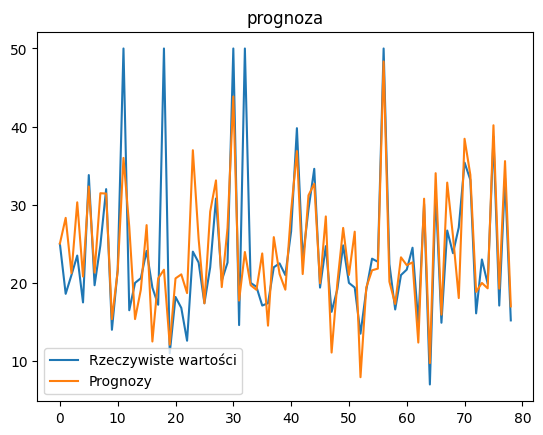

In [97]:
from sklearn.metrics import mean_squared_error
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(Dense(10, input_shape=(13,), activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01))

model.fit(X_train, y_train, epochs=200, batch_size=100, verbose=1, validation_split=0.2)

y_pred = model.predict(X_test)
import matplotlib.pyplot as plt
plt.plot(y_test, label='Rzeczywiste wartości')
plt.plot(y_pred, label='Prognozy')
plt.legend()
plt.title('prognoza')
plt.show()

In [74]:
# loss: 27.6230 - val_loss: 19.7646


3/3 [==============================] - 0s 3ms/step


### Zadanie 

Twoim zadaniem jest stworzenie modelu klasyfikacji, który przewidzy pobyt (0 - krótki, 1- długi) podstawie zestawu danych dotyczących klientów. W zbiorze danych znajdują się różne cechy kientów.

1. Pierwszym krokiem jest przygotowanie danych do procesu trenowania. Wczytaj dane z pliku CSV i podzielone na cechy (X) oraz zmienne docelowe (y) df['long_stay'], należy teraz podzielić te dane na zbiory treningowe i testowe. Ponadto, bardzo ważne jest znormalizowanie danych, aby uniknąć problemów ze skalowaniem cech i przyspieszyć proces uczenia. Danę są już opowiednio ukategoryzowane z użyciem one_hot_encodera. 



In [1]:
import pandas as pd 

df = pd.read_csv('/kaggle/input/hotel-booking-demand-imputed/preprocessed_data_long_stays.csv')

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.losses import binary_crossentropy
y = df['long_stay']
# X todo
df =  df.dropna()
X = df.iloc[:, :-1].values  
scaler = StandardScaler()
X = scaler.fit_transform(X)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Określ liczbę składowych głównych (np. 2)

# Wytrenuj PCA na danych
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [56]:
model = Sequential()
model.add(Dense(10, input_shape=(2,), activation='relu'))
model.add(Dropout(0.1))
#model.add(Dense(10, activation='relu'))
#model.add(Dense(5, activation='relu'))
model.add(Dense(1))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics='accuracy')

model.fit(X_train, y_train, epochs=100, batch_size=1000, verbose=1, validation_split=0.2)

Epoch 1/100
56/56 [==============================] - 1s 7ms/step - loss: 1.2402 - accuracy: 0.8402 - val_loss: 0.8304 - val_accuracy: 0.8506
Epoch 2/100
56/56 [==============================] - 0s 4ms/step - loss: 0.7177 - accuracy: 0.8379 - val_loss: 0.5538 - val_accuracy: 0.8494
Epoch 3/100
56/56 [==============================] - 0s 4ms/step - loss: 0.6454 - accuracy: 0.8381 - val_loss: 0.5128 - val_accuracy: 0.8473
Epoch 4/100
56/56 [==============================] - 0s 4ms/step - loss: 0.6174 - accuracy: 0.8331 - val_loss: 0.5091 - val_accuracy: 0.8457
Epoch 5/100
56/56 [==============================] - 0s 4ms/step - loss: 0.5915 - accuracy: 0.8332 - val_loss: 0.4781 - val_accuracy: 0.8471
Epoch 6/100
56/56 [==============================] - 0s 4ms/step - loss: 0.6138 - accuracy: 0.8377 - val_loss: 0.4920 - val_accuracy: 0.8478
Epoch 7/100
56/56 [==============================] - 0s 4ms/step - loss: 0.5730 - accuracy: 0.8354 - val_loss: 0.4829 - val_accuracy: 0.8514
Epoch 8/100
5

In [ ]:
Na 209 danych wejsciowych mamy 4ms/step - loss: 0.4231 - accuracy: 0.8750 - val_loss: 0.4405 - val_accuracy: 0.8719
Na 10 danych wejsciowych mamy 4ms/step - loss: 0.3632 - accuracy: 0.8730 - val_loss: 0.3723 - val_accuracy: 0.8672
Na 2 danych wejsciowych mamy 4ms/step - loss: 0.3903 - accuracy: 0.8614 - val_loss: 0.3994 - val_accuracy: 0.8549

O dziwo zmniejszenie ilości danych wejściowych powoduje zmniejszoną dokładność ale i mniejszy błąd

2. **Model clasyfikujący**: Zdefiniuj swój model sieci neurnonowej. Jest to model klasyfikujący, który składa się z warstw Dense.
​
3. **Kompilacja modelu**: Model musi zostać skompilowany z odpowiednim optymalizatorem (w tym przypadku 'adam') i funkcją straty (binary_crossentropy).
​
4. **Trenowanie modelu**: Trenuj model na danych treningowych z użyciem zbioru walidacyjnego. Możesz dostosować liczbę epok, rozmiar wsadu (batch size) i inne parametry trenowania, aby uzyskać jak najlepsze wyniki.
​
5. **Ewaluacja modelu**: Po zakończeniu trenowania, ocen model na danych testowych. Sprawdź jak dobrze model przewiduje ceny nieruchomości i accuray.
​
6. **Predykcja na nowych danych**: Przetestuj model, przewidując **long_stay** na podstawie danych treningowych.
​


In [57]:
# Ocena modelu
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)
print('Train Loss:', train_loss)
print('Test Loss:', test_loss)

# Predykcja
predictions = model.predict(X_test)


547/547 [==============================] - 1s 2ms/step - loss: 0.3880 - accuracy: 0.8609
Train Loss: [0.38979294896125793, 0.8601750731468201]
Test Loss: [0.38799962401390076, 0.8608695864677429]
547/547 [==============================] - 1s 1ms/step


# Zadanie: Analiza 16 typów osobowości na podstawie Tweetów
Twoim zadaniem jest stworzenie modelu sieci neuronowej, który będzie klasyfikować tweety na podstawie osobowości osób piszących. W danych mamy dostarczone tweety oraz etykiety osobowości (np. INTP, ENTJ).

## Kroki, które musisz podjąć:

1. Przygotowanie danych: Dane zostały wczytane z pliku CSV. Teksty tweetów znajdują się w kolumnach tweet_1, tweet_2, itp., a etykiety sentymentu w kolumnie "sentiment". Teksty tweetów oraz etykiety sentymentu są przygotowane do dalszej obróbki.

2. Tokenizacja tekstu: Teksty tweetów są tokenizowane za pomocą Tokenizer, a następnie przekształcane na sekwencje liczb. Jest to niezbędne, aby można było używać ich jako danych wejściowych do modelu sieci neuronowej.

3. Model sieci neuronowej: Model sieci neuronowej jest zdefiniowany w kodzie i składa się z następujących warstw:

* Warstwa wejściowa: Przyjmuje sekwencje tokenów o maksymalnej długości max_sequence_length.
* Warstwa Embedding: Mapuje tokeny na wektory o wymiarze 100.
* Warstwa LSTM: Warstwa rekurencyjna LSTM o rozmiarze 64, która przetwarza sekwencje wektorów.
* Warstwa Dense: Warstwa wyjściowa z funkcją aktywacji softmax, która generuje trzy możliwe klasy sentymentu.
* Kompilacja modelu: Model jest kompilowany z optymalizatorem Adam, funkcją straty "sparse_categorical_crossentropy" (odpowiednia do klasyfikacji wieloklasowej) oraz metryką "accuracy".

4. Trenowanie modelu: Model jest trenowany na danych tweetów przez 5 epok, z wsadem o rozmiarze 32. Wynik trenowania jest oceniany na zbiorze walidacyjnym.

Twoim zadaniem jest uzupełnienie kodu i dostosowanie parametrów modelu oraz trenowania, aby uzyskać jak najlepsze wyniki w zadaniu analizy 16 typów osobowości na podstawie tweetów. Możesz eksperymentować z parametrami, takimi jak liczba epok trenowania, rozmiar wsadu (batch size), wymiar embeddingu czy rozmiar warstwy LSTM, aby dostosować model do danego zadania analizy sentymentu tekst

In [5]:
import pandas as pd 

df = pd.read_csv('/kaggle/input/filtered-eng-twitter/languages_eng_cleaned.csv')
df.head()

,Unnamed: 0,id,tweet_1,tweet_2,tweet_3,tweet_4,tweet_5,tweet_6,tweet_7,tweet_8,...,tweet_193,tweet_194,tweet_195,tweet_196,tweet_197,tweet_198,tweet_199,tweet_200,mbti_personality,detected_language
0,1,<NUMBER>,"PLEASE VOTE, VOTE, VOTE FOR AMYBETH! thanks! i...",RT <USER>: Look at this cutie! Thank you for t...,"'kelangan talaga lumipat ng bahay, pero di ka ...",forgiveness and justice.\nforgiveness with jus...,hirap maging babae no? <TAG>PamilyaKoPagkabuwag,"eh damang-dama ko yung pagod ni luz, yung pago...","oo nga no? makes you think, what's your deal-b...",hay nako si apol timing fail talaga.\n<TAG>Pam...,...,RT <USER>: <USER> <URL> \nIn all of these scen...,RT <USER>: Who can pinpoint the exact moment A...,"RT <USER>: Dear Gilbert,\n\nI'm throwing the r...",RT <USER>: (ANNE NATION)\n\nwe are everyone \n...,RT <USER>: (what is love)\n\nloving is learnin...,RT <USER>: This Anne Nation. \n\nAdded active ...,RT <USER>: To fail means we’ve tried. To be hu...,<USER> hahahahahahaha! tingnan natin! mahal ko...,infp,en
1,3,<NUMBER>,RT <USER>: 🤷‍♀️\n<TAG>EXOLSelcaDay \n<USER> <URL>,RT <USER>: when is this from??? 😭😭😭 <URL>,"RT <USER>: since we're talking about suhø, a f...",I am supporting this fundraising page <URL> an...,RT <USER>: Sun and moon outfits <URL>,<USER> that looks like porridge AND TO DRAIN I...,"RT <USER>: Au Revoir, Paris (세훈)\n\n👉🏻<URL>\n\...",RT <USER>: this is definitely one of my fav se...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,infp,en
2,5,<NUMBER>,RT <USER>: The media are just feeding fear ove...,RT <USER>: How my mother feels about these che...,"RT <USER>: I know now, as an adult, it’s my re...","RT <USER>: In the right now, I know that you n...",RT <USER>: I grew up and still have moments of...,RT <USER>: I also never had space for my menta...,"RT <USER>: I grew up “tip toeing” , watching t...",RT <USER>: Let's discuss UK Wig Makers 😭🥺 <URL>,...,RT <USER>: Beyoncé's <NUMBER>/<NUMBER> video i...,RT <USER>: <TAG>InternationalWomensDay began o...,RT <USER>: It’s fascinating how our love langu...,Bread <URL>,Queen <URL>,And the land is dark <URL>,Couple days ago <URL>,NaN,infp,en
3,6,<NUMBER>,RT <USER>: Are y'all washing your hands at hom...,<USER> <URL>,"<USER> not ""bun in the front"". straight to the...","RT <USER>: Doug Collins, who has self-quaranti...",<USER> <USER> Imagine if she challenged you to...,<USER> They really do!,<USER> Stepping that ground game up and not ha...,RT <USER>: Folks should spend more time on doo...,...,<USER> being blocked is a blessing lol,<USER> <USER> it makes no sense.,<USER> 😭,<USER> yes <URL>,RT <USER>: If Bloomberg wanted to waste <NUMBE...,<USER> mugs really were saying they'd look bey...,Please inform all the ppl who were saying they...,<USER> 😭😭,infp,en
4,8,<NUMBER>,RT <USER>: <TAG>Supergirl really missed the ma...,RT <USER>: Wild how most of the media response...,RT <USER>: Let it be known that these are the ...,RT <USER>: The ultimate ghost Pokemon got ghos...,RT <USER>: Dear ableds: Panic buying is not go...,"<USER> exactly, and corporate world is really ...",I would report him to HR and my employer will ...,<USER> <USER> <USER> <USER> are you guys even ...,...,"oh dear, youve only got <NUMBER> followers so ...",<USER> Katie McGrath,"<USER> <USER> ""except like if they started hav...",TRIED TO MAKE BANANA PANCAKE BUT IT FAILED 🙃 <...,RT <USER>: Never going to an anime convention ...,"RT <USER>: ""I'm gonna be a SOLDIER. The best o...",NaN,NaN,infp,en


In [7]:
import pandas as pd
#y = df['mbti_personality']
labels, uniques = pd.factorize(df['mbti_personality'])
y_raw = labels
y=y_raw
y

array([ 0,  0,  0, ..., 15, 15, 15])

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np
X = df.iloc[:, 2:-2]
X=X.values.tolist()
X=np.array(X).reshape(-1,1)
y = [val for val in y for _ in range(200)]


In [16]:
np.shape(X)

(1718800, 1)

In [17]:
np.shape(y)

(1718800,)

In [9]:
nan_indices = np.array(['nan' in row for row in X])
np.shape(nan_indices)

(1718800,)

In [10]:
X_cleaned = X[~nan_indices]
np.shape(X_cleaned)

(1259909, 1)

In [11]:
np.shape(nan_indices)
y_cleaned=[]
for i,nan_i in enumerate(nan_indices):
    if ~nan_i:
        y_cleaned.append(y[i])
np.shape(y_cleaned)

(1259909,)

In [12]:
X=X_cleaned.astype(str)
y=np.array(y_cleaned)
X=X.reshape(-1)
y

array([ 0,  0,  0, ..., 15, 15, 15])

In [13]:


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
word_index = tokenizer.word_index
max_sequence_length = max(len(seq) for seq in X)

In [15]:
np.shape(sequences[0])

(21,)

In [16]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, 16)

In [17]:
X_train, X_val, y_train, y_val = train_test_split(sequences, y, test_size=0.3, random_state=42)
X_train = pad_sequences(X_train, maxlen=max_sequence_length)
X_val = pad_sequences(X_val, maxlen=max_sequence_length)


In [20]:
max_sequence_length


413

In [23]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense,Dropout
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(Embedding(input_dim=max_sequence_length, output_dim=100))  
model.add(LSTM(256)) 
#model.add(Dropout(0.5)) 
model.add(Dense(256, activation='relu')) 
model.add(Dense(16, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=2, batch_size=100, verbose=1, validation_data=(X_val,y_val))



Epoch 1/2
8820/8820 [==============================] - 460s 52ms/step - loss: 2.3968 - accuracy: 0.1719 - val_loss: 2.3857 - val_accuracy: 0.1765
Epoch 2/2
8820/8820 [==============================] - 425s 48ms/step - loss: 2.3974 - accuracy: 0.1705 - val_loss: 2.3998 - val_accuracy: 0.1725


In [25]:
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_val, y_val)
print('Train Loss:', train_loss)
print('Test Loss:', test_loss)

# Predykcja
predictions = model.predict(X_val)

11812/11812 [==============================] - 107s 9ms/step - loss: 2.3998 - accuracy: 0.1725
Train Loss: [2.401848554611206, 0.17105096578598022]
Test Loss: [2.3997645378112793, 0.17246998846530914]
11812/11812 [==============================] - 93s 8ms/step


In [35]:
Wyszła niska dokladnosc - jest to spowodowane tym ze dane sa w tej chwili wymieszane i bierzemy pod uwage tylko jeden tweet.
Poprawnie należałoby zrobić to w ten sposób, że w train_test_split  tak podzielic zbiory, zeby w testowym byly wszystkie tweety danego uzytkownika. 
Nastepnie nauczyc siec i przypisac osobowosci do tweetow a nastepnie wybrac najczesciej wystepujaca osobowosc w tweetach uzytkownika jako ocene osobowosci uzytkownika
